In [8]:
#import needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

from joblib import dump, load

import seaborn as sns

### Load Data

In [4]:
df = pd.read_csv('input_label.csv')

dfX = df['text'].astype(str)
dfY = df['label']

dfXArr = dfX.to_numpy()
dfYArr = dfY.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(dfXArr, dfYArr, test_size= 0.3, random_state=313)

### Data Preprocessing (aka feature generation)

Use the bag of words model to extract features from the text data

In [5]:
vectorizer = CountVectorizer()
train_count = vectorizer.fit_transform(x_train)
test_count = vectorizer.transform(x_test)

print(train_count.shape)

(31428, 191071)


In [6]:
print(test_count.shape)

(13470, 191071)


### Modeling

In [7]:
%%time
# training
model = SVC(C=1, kernel='linear', gamma=1)
model.fit(train_count, y_train)
dump(model, 'svm_training.joblib')

CPU times: user 1min 58s, sys: 560 ms, total: 1min 58s
Wall time: 1min 58s


['svm_training.joblib']

In [9]:
%%time
# inference
prediction = model.predict(test_count)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6967
           1       0.99      0.99      0.99      6503

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470

CPU times: user 20 s, sys: 72.8 ms, total: 20.1 s
Wall time: 20.1 s


In [10]:
# confusion matrix
cf_matrix = confusion_matrix(y_test, prediction)
print(cf_matrix)

[[6917   50]
 [  75 6428]]


<AxesSubplot:>

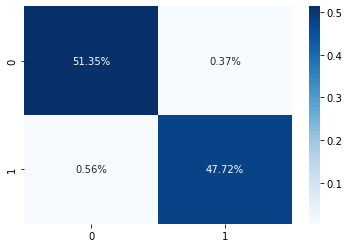

In [11]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

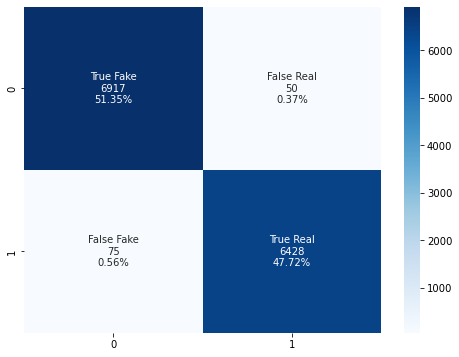

In [30]:
fig, ax = plt.subplots(figsize=(8,6))

group_names = ['True Fake','False Real','False Fake','True Real']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='', ax=ax)
plt.show()

### Another set of test data from politifact

In [12]:
politifactDf = pd.read_csv('politifact_labeled.csv')

politifact_x = politifactDf['sources_quote'].astype(str).to_numpy()
politifact_y = politifactDf['label'].to_numpy()

In [13]:
vectorizer_pf = CountVectorizer()
politifact_ct = vectorizer_pf.fit_transform(politifact_x)

In [14]:
%%time
# inference
preidciton_pf = model.predict(politifact_ct)
print(classification_report(politifact_y, preidciton_pf))

ValueError: X.shape[1] = 15102 should be equal to 191071, the number of features at training time